In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from time import time
from fourier2d import *

rng = np.random.default_rng(42)

LOAD DATA

In [2]:
train_u0, train_u1 = np.load("dataset/train.npy")
test_u0, test_u1 = np.load("dataset/test.npy")

print("train_u0.shape =", train_u0.shape)
print("train_u1.shape =", train_u1.shape)
print("test_u0.shape =", test_u0.shape)
print("test_u1.shape =", test_u1.shape)

train_u0.shape = (900, 64, 64)
train_u1.shape = (900, 64, 64)
test_u0.shape = (100, 64, 64)
test_u1.shape = (100, 64, 64)


TRAIN AND PLOT FUNCTION

In [15]:
def compute_rel_l2_error(true, prediction):
    diff_norm = np.linalg.norm(true-prediction, axis=1)
    true_norm = np.linalg.norm(true, axis=1)
    return np.mean(diff_norm/true_norm)  

def train(n_blocks=1,n_modes=(2,2), regularization_scale=1e-8,n_hidden_channels=16,layer_width=16,random_seed=11,activation="tanh",parameter_sampler="tanh"):
    model = FNO2D(
        n_modes=n_modes,
        n_blocks=n_blocks,
        n_hidden_channels=n_hidden_channels,
        layer_width=layer_width,
        activation=activation,
        parameter_sampler=parameter_sampler,
        random_seed=random_seed,
        regularization_scale=regularization_scale,
    )
    
    print(f"n_modes: {n_modes}")
    print(f"n_blocks: {n_blocks}")
    print(f"n_hidden_channels: {n_hidden_channels}")
    print(f"layer_width: {layer_width}")
    print(f"activation: {activation}")
    print(f"parameter_sampler: {parameter_sampler}")
    print(f"random_seed: {random_seed}")
    print(f"regularization_scale: {regularization_scale}")
    print("\n")
    
    start = time()
    model.fit(train_u0,train_u1)
    fit_time = time()-start
    print(f"Fit time: {fit_time:.2f} seconds")

    start = time()
    pred_u1 = model.transform(test_u0)
    transform_time = time()-start
    print(f"Transform time: {transform_time:.2f} seconds")

    rel_l2_error = compute_rel_l2_error(test_u1, pred_u1)
    print(f"Relative l2 error: {rel_l2_error:.3e}")
    print("\n")

    return fit_time, transform_time, rel_l2_error

def plot(hyperparameters, parameter_name,fit_times_tanh, transform_times_tanh, errors_tanh, fit_times_relu, transform_times_relu, errors_relu, xlog=False):
    # Improved plot for errors
    plt.figure(figsize=(10, 6))
    plt.plot(hyperparameters, errors_relu, color='tab:red', marker='o', label='ReLU')
    plt.plot(hyperparameters, errors_tanh, color='tab:blue', marker='x', label='Tanh')
    plt.xlabel(parameter_name)
    plt.ylabel('Relative L2 Error')
    if xlog:
        plt.xscale('log')
    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
    plt.xticks(hyperparameters)
    plt.title(f'FNO2D Model Error vs {parameter_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Improved plot for times
    plt.figure(figsize=(10, 6))
    plt.plot(hyperparameters, fit_times_relu, color='tab:blue', marker='x', label='Fit Time (ReLU)')
    plt.plot(hyperparameters, transform_times_relu, color='tab:green', marker='s', label='Transform Time (ReLU)')
    plt.plot(hyperparameters, fit_times_tanh, color='tab:orange', marker='o', label='Fit Time (Tanh)')
    plt.plot(hyperparameters, transform_times_tanh, color='tab:red', marker='^', label='Transform Time (Tanh)')
    plt.xlabel(parameter_name)
    plt.ylabel('Time (seconds)')
    if xlog:
        plt.xscale('log')
    plt.xticks(hyperparameters)
    plt.title(f'FNO2D Model Time vs {parameter_name}')
    plt.legend()
    plt.grid(True)
    plt.show()



TRAIN MODEL WITH DEFAULT PARAMETERS

In [4]:
train()
train(activation="relu",parameter_sampler="relu")

n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 23.68 seconds
Transform time: 1.68 seconds
Relative l2 error: 4.183e-01


n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 16
layer_width: 16
activation: relu
parameter_sampler: relu
random_seed: 11


Fit time: 23.08 seconds
Transform time: 1.11 seconds
Relative l2 error: 3.906e-01




(23.084670305252075, 1.1057980060577393, 0.3905900421419919)

TRAIN MODEL WITH DIFFERENT N_BLOCKS

Train # 1
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 22.41 seconds
Transform time: 1.04 seconds
Relative l2 error: 4.183e-01


Train # 2
n_modes: (2, 2)
n_blocks: 2
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 42.64 seconds
Transform time: 1.89 seconds
Relative l2 error: 3.989e-01


Train # 3
n_modes: (2, 2)
n_blocks: 3
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 61.93 seconds
Transform time: 2.91 seconds
Relative l2 error: 4.058e-01


Train # 4
n_modes: (2, 2)
n_blocks: 4
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 84.47 seconds
Transform time: 4.02 seconds
Relative l2 error: 4.177e-01


Train # 5
n_modes: (2, 2)
n_blocks: 5
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_

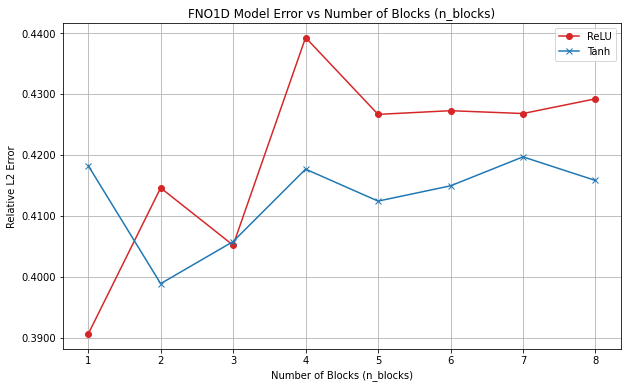

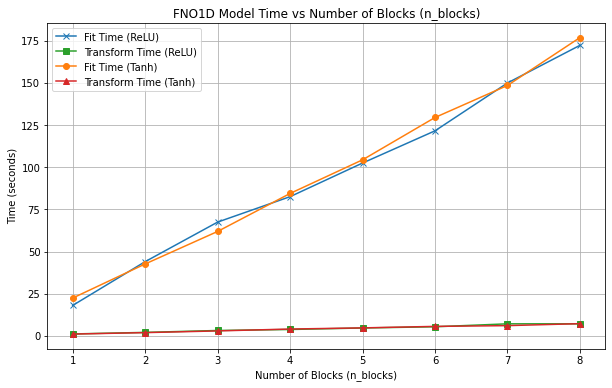

In [8]:
list_of_n_blocks = [1,2,3,4,5,6,7,8]
errors_tanh = []
fit_times_tanh = []
transform_times_tanh = []

for i,n in enumerate(list_of_n_blocks):
    print("Train #",i+1)
    fit_time, transform_time, rel_l2_error = train(n_blocks=n)
    fit_times_tanh.append(fit_time)
    transform_times_tanh.append(transform_time)
    errors_tanh.append(rel_l2_error)

errors_relu = []
fit_times_relu = []
transform_times_relu = []

for i,n in enumerate(list_of_n_blocks):
    print("Train #",i+1)
    fit_time, transform_time, rel_l2_error = train(n_blocks=n,activation="relu",parameter_sampler="relu")
    fit_times_relu.append(fit_time)
    transform_times_relu.append(transform_time)
    errors_relu.append(rel_l2_error)

plot(list_of_n_blocks,'Number of Blocks (n_blocks)',fit_times_tanh, transform_times_tanh, errors_tanh, fit_times_relu, transform_times_relu, errors_relu)


TRAIN MODEL WITH DIFFERENT NUMBER OF HIDDEN CHANNELS

Train # 1
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 1
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 2.33 seconds
Transform time: 0.12 seconds
Relative l2 error: 4.125e-01


Train # 2
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 2
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 3.61 seconds
Transform time: 0.16 seconds
Relative l2 error: 4.186e-01


Train # 3
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 4
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 5.70 seconds
Transform time: 0.29 seconds
Relative l2 error: 4.181e-01


Train # 4
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 8
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 10.01 seconds
Transform time: 0.53 seconds
Relative l2 error: 4.182e-01


Train # 5
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 1

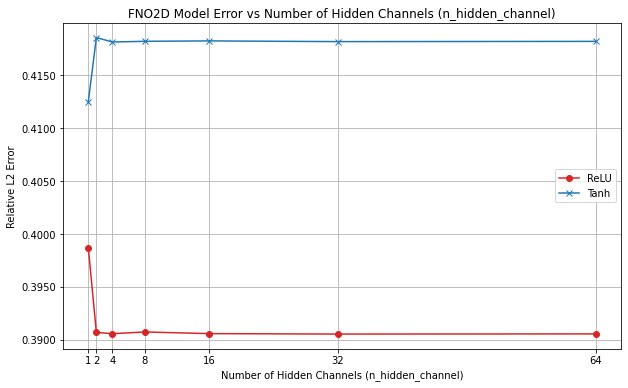

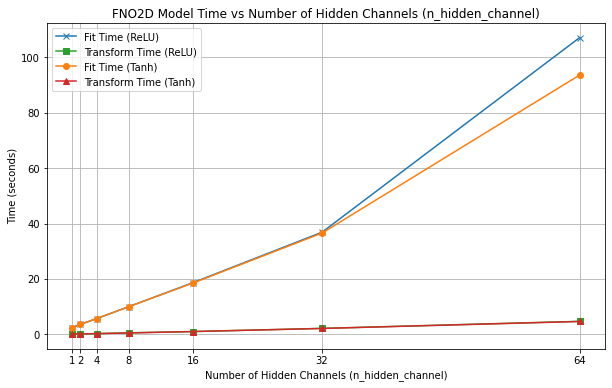

In [5]:
list_of_n_hc = [1,2,4,8,16,32,64]
errors_tanh = []
fit_times_tanh = []
transform_times_tanh = []

for i,n in enumerate(list_of_n_hc):
    print("Train #",i+1)
    fit_time, transform_time, rel_l2_error = train(n_hidden_channels=n)
    fit_times_tanh.append(fit_time)
    transform_times_tanh.append(transform_time)
    errors_tanh.append(rel_l2_error)

errors_relu = []
fit_times_relu = []
transform_times_relu = []

for i,n in enumerate(list_of_n_hc):
    print("Train #",i+1)
    fit_time, transform_time, rel_l2_error = train(n_hidden_channels=n,activation="relu",parameter_sampler="relu")
    fit_times_relu.append(fit_time)
    transform_times_relu.append(transform_time)
    errors_relu.append(rel_l2_error)

plot(list_of_n_hc,'Number of Hidden Channels (n_hidden_channel)',fit_times_tanh, transform_times_tanh, errors_tanh, fit_times_relu, transform_times_relu, errors_relu)


TRAIN MODEL WITH DIFFERENT N_MODES

Train # 1
n_modes: (1, 1)
n_blocks: 1
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 23.42 seconds
Transform time: 1.37 seconds
Relative l2 error: 4.182e-01


Train # 2
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 19.75 seconds
Transform time: 1.12 seconds
Relative l2 error: 4.183e-01


Train # 3
n_modes: (4, 4)
n_blocks: 1
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 20.41 seconds
Transform time: 1.16 seconds
Relative l2 error: 4.182e-01


Train # 4
n_modes: (8, 8)
n_blocks: 1
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 20.92 seconds
Transform time: 1.34 seconds
Relative l2 error: 4.182e-01


Train # 5
n_modes: (16, 16)
n_blocks: 1
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
rando

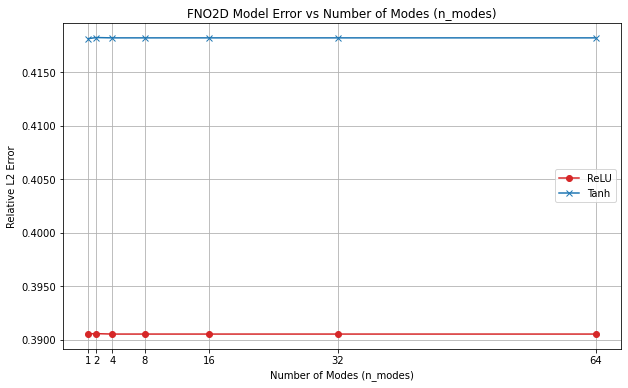

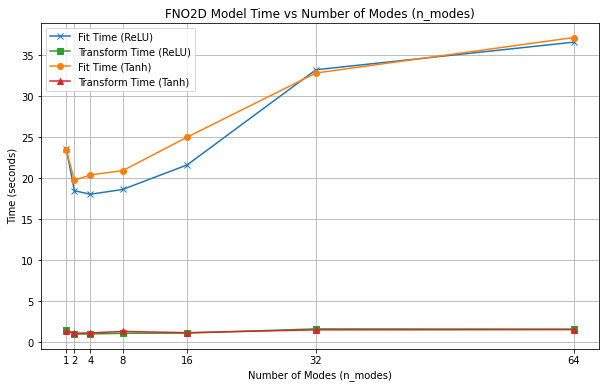

In [14]:
list_of_n_modes = [(1,1),(2,2),(4,4),(8,8),(16,16),(32,32),(64,64)]
errors_tanh = []
fit_times_tanh = []
transform_times_tanh = []

for i,n in enumerate(list_of_n_modes):
    print("Train #",i+1)
    fit_time, transform_time, rel_l2_error = train(n_modes=n)
    fit_times_tanh.append(fit_time)
    transform_times_tanh.append(transform_time)
    errors_tanh.append(rel_l2_error)

errors_relu = []
fit_times_relu = []
transform_times_relu = []

for i,n in enumerate(list_of_n_modes):
    print("Train #",i+1)
    fit_time, transform_time, rel_l2_error = train(n_modes=n,activation="relu",parameter_sampler="relu")
    fit_times_relu.append(fit_time)
    transform_times_relu.append(transform_time)
    errors_relu.append(rel_l2_error)

list_of_n_modes = [1,2,4,8,16,32,64]
plot(list_of_n_modes,'Number of Modes (n_modes)',fit_times_tanh, transform_times_tanh, errors_tanh, fit_times_relu, transform_times_relu, errors_relu)


TRAIN MODEL WITH DIFFERENT LAYER WIDTH

Train # 1
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 16
layer_width: 2
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 39.04 seconds
Transform time: 1.57 seconds
Relative l2 error: 8.436e-01


Train # 2
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 16
layer_width: 4
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 24.55 seconds
Transform time: 1.52 seconds
Relative l2 error: 6.810e-01


Train # 3
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 16
layer_width: 8
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 24.88 seconds
Transform time: 1.52 seconds
Relative l2 error: 5.469e-01


Train # 4
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 25.33 seconds
Transform time: 1.51 seconds
Relative l2 error: 4.183e-01


Train # 5
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 16
layer_width: 32
activation: tanh
parameter_sampler: tanh
random_see

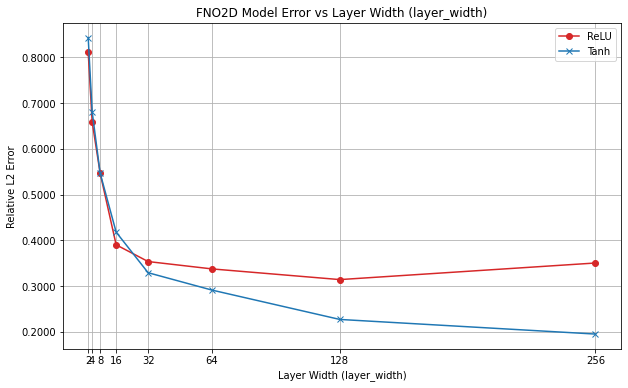

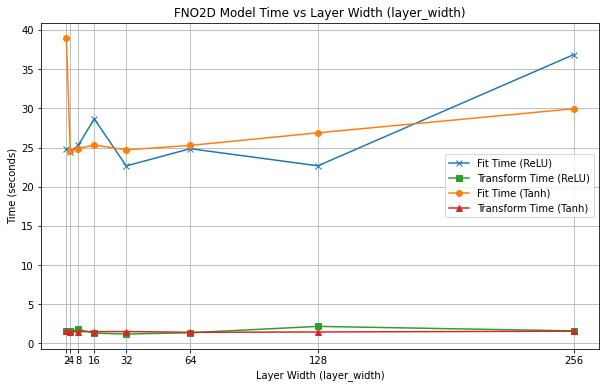

In [8]:
list_of_lw = [2,4,8,16,32,64,128,256]
errors_tanh = []
fit_times_tanh = []
transform_times_tanh = []

for i,n in enumerate(list_of_lw):
    print("Train #",i+1)
    fit_time, transform_time, rel_l2_error = train(layer_width=n)
    fit_times_tanh.append(fit_time)
    transform_times_tanh.append(transform_time)
    errors_tanh.append(rel_l2_error)

errors_relu = []
fit_times_relu = []
transform_times_relu = []

for i,n in enumerate(list_of_lw):
    print("Train #",i+1)
    fit_time, transform_time, rel_l2_error = train(layer_width=n,activation="relu",parameter_sampler="relu")
    fit_times_relu.append(fit_time)
    transform_times_relu.append(transform_time)
    errors_relu.append(rel_l2_error)

plot(list_of_lw,'Layer Width (layer_width)',fit_times_tanh, transform_times_tanh, errors_tanh, fit_times_relu, transform_times_relu, errors_relu)


TRAIN MODEL WITH DIFFERENT REGULARIZATION SCALE

Train # 1
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11
regularization_scale: 1e-08


Fit time: 24.76 seconds
Transform time: 2.43 seconds
Relative l2 error: 4.183e-01


Train # 2
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11
regularization_scale: 1e-07


Fit time: 19.43 seconds
Transform time: 1.05 seconds
Relative l2 error: 4.183e-01


Train # 3
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11
regularization_scale: 1e-06


Fit time: 19.67 seconds
Transform time: 1.15 seconds
Relative l2 error: 4.183e-01


Train # 4
n_modes: (2, 2)
n_blocks: 1
n_hidden_channels: 16
layer_width: 16
activation: tanh
parameter_sampler: tanh
random_seed: 11
regularization_scale: 1e-05


Fit time: 19.28 seconds
Transform time: 1.03 seconds
Relative l2 error: 4.183e-01


Train # 5
n_

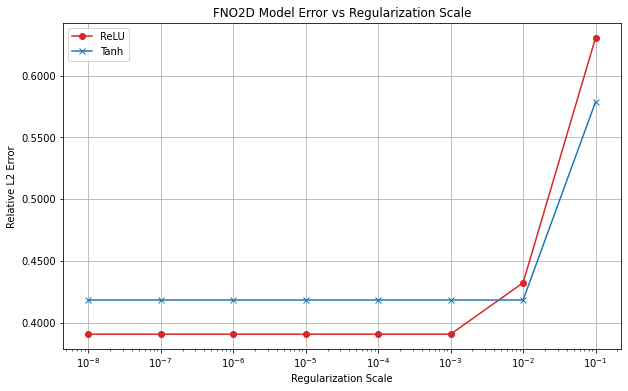

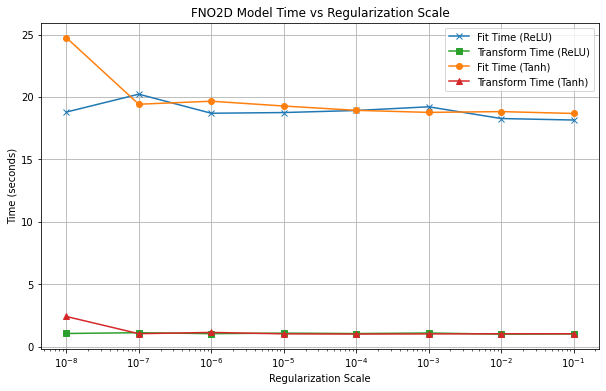

In [16]:
list_of_rs = [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,0.1]
errors_tanh = []
fit_times_tanh = []
transform_times_tanh = []

for i,n in enumerate(list_of_rs):
    print("Train #",i+1)
    fit_time, transform_time, rel_l2_error = train(regularization_scale=n)
    fit_times_tanh.append(fit_time)
    transform_times_tanh.append(transform_time)
    errors_tanh.append(rel_l2_error)

errors_relu = []
fit_times_relu = []
transform_times_relu = []

for i,n in enumerate(list_of_rs):
    print("Train #",i+1)
    fit_time, transform_time, rel_l2_error = train(regularization_scale=n,activation="relu",parameter_sampler="relu")
    fit_times_relu.append(fit_time)
    transform_times_relu.append(transform_time)
    errors_relu.append(rel_l2_error)

plot(list_of_rs,'Regularization Scale',fit_times_tanh, transform_times_tanh, errors_tanh, fit_times_relu, transform_times_relu, errors_relu,xlog=True)


BEST HYPERPARAMETERS

In [9]:
train(n_blocks=2,n_hidden_channels=4,layer_width=256)

n_modes: (2, 2)
n_blocks: 2
n_hidden_channels: 4
layer_width: 256
activation: tanh
parameter_sampler: tanh
random_seed: 11


Fit time: 19.19 seconds
Transform time: 1.21 seconds
Relative l2 error: 1.980e-01




(19.187267303466797, 1.2120249271392822, 0.19803579476604502)